# World Health Sensor Project

This notebook provides a concise overview of the critical steps undertaken throughout the project.

**By Carol Calderon**

Jun - Aug 2023

## Objective

Using The Global Health Observatory OData API to fetch data from it's data collection. Analyze the data using data science techniques and create an interactive dashboard to visualize and explore the insights.

## Project steps:

1. **Select the Data Source:** Determine the specific OData API that provides the data needed for the analysis. Explore available public datasets. Determine the analysis goals.

2. **Understand the API:** Study the documentation of the OData API to understand its endpoints, query parameters, and how to retrieve data. Identify the available resources, data models, and relationships between entities.

3. **Retrieve and Preprocess Data:** Use the OData API to fetch the required data based on the analysis goals. Apply data preprocessing steps like cleaning, filtering, and transforming the data as necessary to prepare it for analysis.

3. **Analyze the Data:** Utilize data science techniques and libraries such as pandas, NumPy, or scikit-learn to perform exploratory data analysis (EDA), statistical analysis, visualizations, or machine learning tasks. Extract meaningful insights and identify patterns or correlations in the data. Select the appropriate visualization tool like Matplotlib, Seaborn, or Plotly to create interactive and informative visualizations.

4. **Design the Dashboard:** Design the user interface and layout of the dashboard using libraries like Dash, Streamlit, or Tableau. Create an intuitive and user-friendly dashboard that allows users to interact with the visualizations, apply filters, and explore the data dynamically.

5. **Deploy the Dashboard:** Host the dashboard on a web server or a cloud platform to make it accessible online. This could involve deploying it as a web application or utilizing cloud hosting services like Heroku or AWS. **Test and Iterate:** Test the functionality and usability of the dashboard, seeking feedback from potential users. Iterate on the design and make improvements based on user input and additional data analysis requirements.

## Project Tools:
    
Data Source: 

- The Global Health Observatory <https://www.who.int/data/gho>
- OData API documentation: <https://www.who.int/data/gho/info/gho-odata-api>

Retrieve the data: 

- **requests** or **urllib** to make HTTP requests to the OData API and retrieve the data.
- Pandas: Perform data preprocessing, cleaning, filtering, and transformation using the powerful data manipulation capabilities of pandas.

Analyze the Data:

- Pandas: Utilize pandas for exploratory data analysis (EDA), data wrangling, and statistical analysis on the retrieved data.
- NumPy: Use NumPy for numerical computations and mathematical operations.

Visualization Tools:

- Matplotlib: Create static visualizations such as line plots, bar charts, and scatter plots.
- Seaborn: Build aesthetically pleasing and informative statistical visualizations.
- Plotly: Develop interactive and customizable visualizations, including interactive charts and dashboards.

Design the Dashboard:

- Dash: Build interactive web-based dashboards using Python and HTML components.

Deploy the Dashboard:

- GitHub pages

Test and Iterate:

- User feedback and testing: Gather feedback from potential users and testers to improve the functionality and user experience of your dashboard.
- Jupyter Notebook or documentation: Document the project, including the data analysis process, code, and key findings.

### 1. Select the Data Source

What I found exploring the GHO Data Collection:

- The GHO data repository serves as the World Health Organization's (WHO) portal to health-related statistics concerning its 194 Member States.
- The Data could be explored by Theme, Category or Indicator.
- The GHO data repository offers access to a wide range of health indicators, exceeding 2000 in number. 
- Indicators cover crucial health topics such as mortality, disease burden, Millennium Development Goals, non-communicable diseases, infectious diseases, health systems, environmental health, violence, injuries, and equity, among others.
- Several indicators do not contain data or the data is not updated or completed.

### 2. Understanding the API

Study the documentation of the OData API to understand its endpoints, query parameters, and how to retrieve data. Identify the available resources, data models, and relationships between entities.

About the API:

The Global Health Observatory (GHO) is constructed using a technology called RESTful web service. REST stands for Representational State Transfer, which is an architectural style used to design networked applications. In this context, GHO uses RESTful web services as the underlying technology to provide access to its data.

RESTful web services use standard HTTP methods (such as GET, POST, PUT, DELETE) to interact with resources (data) over the internet. These resources are identified by URLs, and the web service responds with data in a structured format, often in JSON or XML.

By using a RESTful web service, the Global Health Observatory can allow users to easily retrieve health-related data through standard web protocols, making it accessible and interoperable across various platforms and programming languages. This approach enables efficient data access and manipulation, making it convenient for data analysts and developers to fetch and utilize the health data provided by the GHO.

- The documentation is clear and extensive.

### 3. Retrieve and Preprocess Data: 

Use the OData API to fetch the required data based on the analysis goals. Apply data preprocessing steps like cleaning, filtering, and transforming the data as necessary to prepare it for analysis.

### 3.1 Retrieving

In [1]:
# Import the libraries

import pandas as pd
import requests
import json


GET request to obtain the dimension data directly from the Global Health Observatory API


#### Retrieving all Dimension Values for Country dimension

In [2]:
# Send a GET request to the API endpoint
url = "https://ghoapi.azureedge.net/api/DIMENSION/COUNTRY/DimensionValues"
response = requests.get(url)

# Check the response status code
if response.status_code == 200:
    resp = response.json()
    data_countries = resp['value']
    # Process the data as needed
    for item in data_countries:
        value = item
    print('Request Successful')
        # Process each item in the data

else:
    print("Request failed with status code:", response.status_code)

Request Successful


In [3]:
# Create a countries DataFrame
countries = pd.DataFrame(data_countries)
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Code             248 non-null    object
 1   Title            248 non-null    object
 2   ParentDimension  242 non-null    object
 3   Dimension        248 non-null    object
 4   ParentCode       242 non-null    object
 5   ParentTitle      242 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [4]:
countries.head(5)

Code        Title ParentDimension Dimension ParentCode  \
0  ABW        Aruba          REGION   COUNTRY        AMR   
1  AFG  Afghanistan          REGION   COUNTRY        EMR   
2  AGO       Angola          REGION   COUNTRY        AFR   
3  AIA     Anguilla          REGION   COUNTRY        AMR   
4  ALB      Albania          REGION   COUNTRY        EUR   

             ParentTitle  
0               Americas  
1  Eastern Mediterranean  
2                 Africa  
3               Americas  
4                 Europe

In [5]:
print(f'There are {countries.shape[0]} countries in the data')

There are 248 countries in the data


#### Retrieving all Indicators (list of indicators)

In [6]:
# Send a GET request to the API endpoint
url = "https://ghoapi.azureedge.net/api/Indicator"
response = requests.get(url)

# Check the response status code
if response.status_code == 200:
    resp = response.json()
    data_indicators = resp['value']
    # Process the data as needed
    for item in data_indicators:
        value = item
        value #print to see values
        # Process each item in the data

else:
    print("Request failed with status code:", response.status_code)

In [7]:
# Create a indicators DataFrame

indicators = pd.DataFrame(data_indicators)

indicators.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   IndicatorCode  2342 non-null   object
 1   IndicatorName  2342 non-null   object
 2   Language       2342 non-null   object
dtypes: object(3)
memory usage: 55.0+ KB


In [8]:
pd.set_option('display.max_colwidth', None)
indicators.sample(10)

IndicatorCode  \
1738         VIOLENCE_CHILD_NEGLECT   
398                      GHE_YLDNUM   
1781         W18_misleading_terms_C   
1043                        RSUD_26   
79                        csection5   
1064                        RSUD_36   
1711                      TOTENV_11   
567                           IHR10   
707   NCD_CCS_cervicalcancerpgmtype   
2063                   E17a_csr_ban   

                                                                 IndicatorName  \
1738                         Lifetime prevalence of child physical neglect (%)   
398                        Years of healthy life lost due to disability (YLDs)   
1781                     Ban on deceitful terms on smokeless tobacco packaging   
1043             Governement benefits for persons with substance use disorders   
79    Births by caesarean section (in the five years preceding the survey) (%)   
1064                        Sector for outpatient treatment of drug dependence   
1711      Deaths attributable to the environment in children under 5 years (%)   
567                                                                   Zoonosis   
707                         Type of national cervical cancer screening program   
2063                   Ban on Corporate Social Responsibility activities (CSR)   

     Language  
1738       EN  
398        EN  
1781       EN  
1043       EN  
79         EN  
1064       EN  
1711       EN  
567        EN  
707        EN  
2063       EN

In [9]:
print(f'There are {indicators.shape[0]} indicators in the data')


There are 2342 indicators in the data


The number of indicators is really high. Previous exploration of the data (directly in the website) showed that a lot of those indicators do not contain updated data or have several NaN values. 

<div class="alert alert-block alert-info">
<b></b>  The initial personal motivation to build this project came from the curiosity about the trend in Tobacco consumption and global tobacco control initiatives, then I dove deeper into this group of indicators.

#### Retrieving Tobacco indicators

In [10]:
# Looking for the indicators related with 'Tobacco'

Tobacco_indicators = indicators[indicators['IndicatorName'].str.contains('tobacco', case=False)]

Tobacco_indicators

IndicatorCode  \
47              Camp_gov_prog   
104                   E_Group   
109      E11_brand_stretching   
110            E11_compliance   
111         E12_brand_sharing   
...                       ...   
2286       M_Est_tob_curr_std   
2299  Adult_daily_tob_smoking   
2313              E_compl_e11   
2324      Adult_daily_tob_use   
2329       M_Est_smk_curr_std   

                                                                                    IndicatorName  \
47                                 Campaign was part of a comprehensive tobacco control programme   
104                              Enforcing bans on tobacco advertising, promotion and sponsorship   
109                     Ban on non-tobacco goods AND services identified with tobacco brand names   
110       Compliance of ban on non-tobacco goods AND services identified with tobacco brand names   
111                            Ban on brand name of non-tobacco products used for tobacco product   
...                                                                                           ...   
2286                       Estimate of current tobacco use prevalence (%) (age-standardized rate)   
2299                                         Prevalence of daily tobacco smoking among adults (%)   
2313  Compliance with ban on use of brand name of non-tobacco product for tobacco product (score)   
2324                                             Prevalence of daily tobacco use among adults (%)   
2329                   Estimate of current tobacco smoking prevalence (%) (age-standardized rate)   

     Language  
47         EN  
104        EN  
109        EN  
110        EN  
111        EN  
...       ...  
2286       EN  
2299       EN  
2313       EN  
2324       EN  
2329       EN  

[137 rows x 3 columns]

In [11]:
Tobacco_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 47 to 2329
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   IndicatorCode  137 non-null    object
 1   IndicatorName  137 non-null    object
 2   Language       137 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


There are 137 indicators related with 'Tobacco', I'll choose some on them to explore the data available

In [12]:
# Let's explore indicator related with prevalence

Tobacco_prevalence = Tobacco_indicators[Tobacco_indicators['IndicatorName'].str.contains('prevalence', case=False)]

Tobacco_prevalence


IndicatorCode  \
614            M_Est_tob_curr   
1941     Adult_curr_smokeless   
1995      Yth_daily_smokeless   
2058           M_Est_smk_curr   
2062    Adult_daily_smokeless   
2107    Yth_daily_tob_smoking   
2140   Adult_curr_tob_smoking   
2143       Yth_curr_smokeless   
2159       Adult_curr_tob_use   
2234         Yth_curr_tob_use   
2252     Yth_curr_tob_smoking   
2286       M_Est_tob_curr_std   
2299  Adult_daily_tob_smoking   
2324      Adult_daily_tob_use   
2329       M_Est_smk_curr_std   

                                                                   IndicatorName  \
614                               Estimate of current tobacco use prevalence (%)   
1941                Prevalence of current smokeless tobacco use among adults (%)   
1995             Prevalence of daily smokeless tobacco use among adolescents (%)   
2058                          Estimate of current tobacco smoking prevalence (%)   
2062                  Prevalence of daily smokeless tobacco use among adults (%)   
2107                   Prevalence of daily tobacco smoking among adolescents (%)   
2140                      Prevalence of current tobacco smoking among adults (%)   
2143           Prevalence of current smokeless tobacco use among adolescents (%)   
2159                          Prevalence of current tobacco use among adults (%)   
2234                     Prevalence of current tobacco use among adolescents (%)   
2252                 Prevalence of current tobacco smoking among adolescents (%)   
2286      Estimate of current tobacco use prevalence (%) (age-standardized rate)   
2299                        Prevalence of daily tobacco smoking among adults (%)   
2324                            Prevalence of daily tobacco use among adults (%)   
2329  Estimate of current tobacco smoking prevalence (%) (age-standardized rate)   

     Language  
614        EN  
1941       EN  
1995       EN  
2058       EN  
2062       EN  
2107       EN  
2140       EN  
2143       EN  
2159       EN  
2234       EN  
2252       EN  
2286       EN  
2299       EN  
2324       EN  
2329       EN

In [13]:
print(f'There are {Tobacco_prevalence.shape[0]} indicators related with tobacco and prevalence')

There are 15 indicators related with tobacco and prevalence


I used a for loop to write the urls and explore the data in all the indicators within the word 'Prevalence', the process is available in the extended version on GitHub. Finally, the indicator I decided to use was **M_Est_smk_curr_std == Estimate of current tobacco use prevalence (%)**

#### Comment about the exploration of the API and the indicators content.

 Here are some of conclusions of that exploration:

The API is working accordingly and I am pulling the data. Nevertheless the GHO website is not totally coherent with the list of indicators I am working with through the API. This add complexity to the process, considering it is relevant to find the indicator description.

This indicators are listed in [Old GHO indicators list](https://apps.who.int/gho/data/node.imr#ndx-P) :

  - Estimate of current tobacco use prevalence (%) (age-standardized rate) (Tobacco control)
  - Estimate of current tobacco smoking prevalence (%) (age-standardized rate) (Tobacco control)
  - Estimate of current cigarette smoking prevalence (%) (age-standardized rate) (Tobacco control)
  - Estimate of daily tobacco use prevalence (%) (age-standardized rate) (Tobacco control)
  - Estimate of daily tobacco smoking prevalence (%) (age-standardized rate) (Tobacco control)
  - Estimate of daily cigarette smoking prevalence (%) (age-standardized rate) (Tobacco control)

However, there is not `Estimate of current tobacco use prevalence (%)` especific description. Perhaps, this indicator could include same data than `Estimate of current tobacco use prevalence (%) (age-standardized rate)` having additional data in the last one?

[Old GHO indicators list](https://apps.who.int/gho/data/node.imr#ndx-P) links `Estimate of current tobacco use prevalence (%) (age-standardized rate)` to `Prevalence of current tobacco use among persons aged 15 years and older (age-standardized rate)` in the [New GHO indicators list](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/prevalence-of-current-tobacco-use-among-persons-aged-15-years-and-older-(age-standardized-rate)).

The indicators are divided in two groups, those that start with `Estimate` word and `Prevalence` word.

Checking the [GHO indicators list](https://www.who.int/data/gho/data/indicators/indicators-index) there is not description of the indicators that start with 'Prevalence' word.

And the indicators I found in the [Old GHO indicators list](https://apps.who.int/gho/data/node.imr#ndx-P) redirect to the same data: WHO Global Report on Trends in Tobacco Smoking 2000-2025, the WHO Global Health Observatory and the Implementation Database of the WHO FCTC available [here](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-smoking-any-tobacco-product-among-persons-aged-=-15-years). 

I sent a clarification request to the GHO (Aug 3rd 2023) - awaitting for response.

<div class="alert alert-block alert-info">
<b></b> While getting a clarification from GHO I'm going to work based on the assumption that most of these indicators are coming from the same report WHO Global Report on Trends in Tobacco Smoking 2000-2025. 
    
Then I'll choose the indicators that maybe are going to provide me more data about and explore deeper those. </div>




I looked for 'age' data regarding tobacco indicators. However, I did not find any indicator that contained that dimension.

 Tobacco use is indeed a significant contributor to a wide range of non-communicable diseases (NCDs) and is a leading cause of preventable illness and death worldwide. Non-communicable diseases are chronic conditions that are not caused by infectious agents but rather result from a combination of genetic, lifestyle, and environmental factors. These diseases include cardiovascular diseases (like heart disease and stroke), cancer, chronic respiratory diseases (such as chronic obstructive pulmonary disease), and diabetes. [Division of Global Health Protection, Global Health, Centers for Disease Control and Prevention]('https://www.cdc.gov/globalhealth/healthprotection/ncd/tobacco.html').

The harmful effects of tobacco use are primarily attributed to the various toxic substances present in tobacco products, such as nicotine, tar, and carbon monoxide. These substances can damage organs and tissues in the body and increase the risk of developing NCDs. It's also worth noting that secondhand smoke exposure, which occurs when non-smokers breathe in smoke from tobacco products, is also harmful and can lead to similar health risks.

**Indicators**

- NCD_UNDER70	Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths	
- SA_0000001807	Cancer, age-standardized death rates (15+), per 100,000 population
- SDG_SH_DTH_RNCOM	Number of deaths attributed to non-communicable diseases, by type of disease and sex

According with [Canadian Cancer Society](https://cancer.ca/en/cancer-information/reduce-your-risk/live-smoke-free/what-you-need-to-know-about-second-hand-smoke) Second-hand smoke is what smokers breathe out and into the air. It’s also the smoke that comes from a burning cigarette, cigar or pipe. Second-hand smoke has the same chemicals in it as the tobacco smoke breathed in by a smoker. Hundreds of the chemicals in second-hand smoke are toxic. More than 70 of them have been shown to cause cancer in human studies or lab tests. Every year, about 800 Canadian non-smokers die from second-hand smoke.

- SHS_4	Second-hand smoke attributable deaths
- SHS_6	Second-hand smoke attributable deaths per 100'000 capita
- SHS_8	Second-hand smoke attributable deaths ('000) in children under 5 years
- SHS_9	Second-hand smoke attributable deaths per 100'000 children under 5 years
                                                       
                                                       
                                                       

#### Summarizing the indicators exploration: 



**Dataframes to work with in the dashboard:**

| Indicator Code            | Indicator Name                                                                           |
|---------------------------|------------------------------------------------------------------------------------------|
| M_Est_smk_curr_std:  | Estimate of current tobacco use prevalence (%)                                           |
| P_Group:             | Protecting people from tobacco smoke                                                     |
| O_Group:             | Offering help to quit tobacco use                                                        |
| NCD_UNDER70:         | Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths |



#### Indicators Dataframes

In [14]:
# Create a for loop to create the urls for the indicators I found exploring 'deaths' and the indicators I found worthy before.

IndicatorCodes = ['M_Est_smk_curr_std', 'P_Group', 'O_Group', 'NCD_UNDER70']

urls = []

for Codes in IndicatorCodes:
    # Create the URLs
    url = f"https://ghoapi.azureedge.net/api/{Codes}"
    urls.append(url)
    
urls

['https://ghoapi.azureedge.net/api/M_Est_smk_curr_std',
 'https://ghoapi.azureedge.net/api/P_Group',
 'https://ghoapi.azureedge.net/api/O_Group',
 'https://ghoapi.azureedge.net/api/NCD_UNDER70']

In [15]:
# Create a for loop to retrieve the data and transform it into dataframes

df_dictionary = {}

for url in urls:
    response = requests.get(url)

    # Check the response status code
    if response.status_code == 200:
        resp = response.json()
        data = resp['value']            
        # Transform the json responses into dataframes.
        df = pd.DataFrame(data)  
        # Name the df with the indicator code 
        df_name = f"df_{url.split('/')[-1]}"
        # Include each name df into a dictionary
        df_dictionary[df_name] = df
        
    else:
        print("Request failed with status code:", response.status_code)

        # print the dictionary of dataframes.        
print(df_dictionary.keys())

dict_keys(['df_M_Est_smk_curr_std', 'df_P_Group', 'df_O_Group', 'df_NCD_UNDER70'])


In [16]:
# Extract the dfs from the dictionary

df_M_Est_smk_curr_std = df_dictionary['df_M_Est_smk_curr_std']
df_P_Group = df_dictionary['df_P_Group']
df_O_Group = df_dictionary['df_O_Group']
df_NCD_UNDER70 = df_dictionary['df_NCD_UNDER70']


In [17]:
# print the shape

for df in [df_M_Est_smk_curr_std, df_P_Group, df_O_Group, df_NCD_UNDER70]:
    print(f'{df.shape[0]} rows and {df.shape[1]} columns')

4428 rows and 23 columns
1560 rows and 23 columns
1560 rows and 23 columns
11640 rows and 23 columns


### 3.2 Processing

Keep just the columns of interest and renamed to better communication

#### Countries

In [18]:
# Countries dataframe
countries.head(2)

Code        Title ParentDimension Dimension ParentCode  \
0  ABW        Aruba          REGION   COUNTRY        AMR   
1  AFG  Afghanistan          REGION   COUNTRY        EMR   

             ParentTitle  
0               Americas  
1  Eastern Mediterranean

In [19]:
# Rename the columns
countries.rename(columns = {'Code': 'Country Code', 'Title': 'Country', 'ParentTitle': 'WHO Region'}, inplace = True)

In [20]:
# Select specific columns using the .loc indexer
final_countries = countries.loc[:, ['Country Code', 'Country', 'WHO Region']]

In [21]:
# Sanity check
final_countries.head(3)

Country Code      Country             WHO Region
0          ABW        Aruba               Americas
1          AFG  Afghanistan  Eastern Mediterranean
2          AGO       Angola                 Africa

#### Estimate Average Smoking Prevalence

In [22]:
# Estimate of current tobacco use prevalence (%) dataframe
df_M_Est_smk_curr_std.head(1)

Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  27794728  M_Est_smk_curr_std        COUNTRY        DZA        YEAR   

   TimeDim Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value  \
0     2020      SEX  BTSX     None  None  ...          None  15.2   

  NumericValue   Low  High                                         Comments  \
0         15.2  None  None  Projected from surveys completed prior to 2020.   

                            Date TimeDimensionValue  \
0  2022-01-17T09:30:38.763+01:00               2020   

          TimeDimensionBegin           TimeDimensionEnd  
0  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  

[1 rows x 23 columns]

In [23]:
# Rename the columns
df_M_Est_smk_curr_std.rename(columns = {'SpatialDim': 'Country Code', 'ParentTitle': 'WHO Region', 'TimeDim' : 'Year', 'Dim1': 'Sex', 'Value': 'Prevalence'}, inplace = True)

In [24]:
# Select specific columns using the .loc indexer
final_prevalence = df_M_Est_smk_curr_std.loc[:, ['Country Code', 'Year', 'Sex', 'Prevalence']]

In [25]:
# Sanity check
final_prevalence.head(3)

Country Code  Year   Sex Prevalence
0          DZA  2020  BTSX       15.2
1          BEN  2020  BTSX        4.7
2          BWA  2020  BTSX         15

#### Protecting people from tobacco smoke

In [26]:
# MPOWER indicator
df_P_Group.head(1)

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
0  30006027       P_Group        COUNTRY        AFG        YEAR     2007   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
0     None  None     None  None  ...          None     3         None  None   

   High Comments                           Date TimeDimensionValue  \
0  None     None  2022-09-29T14:10:49.153+02:00               2007   

          TimeDimensionBegin           TimeDimensionEnd  
0  2007-01-01T00:00:00+01:00  2007-12-31T00:00:00+01:00  

[1 rows x 23 columns]

In [27]:
# Rename the columns
df_P_Group.rename(columns = {'SpatialDim': 'Country Code', 'ParentTitle': 'WHO Region', 'TimeDim':'Year', 'Value': 'Protection_score'}, inplace = True)

In [28]:
# Select specific columns using the .loc indexer
final_protecting = df_P_Group.loc[:, ['Country Code', 'Year', 'Protection_score']]

In [29]:
# Sanity check
final_protecting.head(3)

Country Code  Year Protection_score
0          AFG  2007                3
1          AFG  2008                3
2          AFG  2010                3

#### Offering help to quit tobacco use

In [30]:
# MPOWER indicator
df_O_Group.head(1)

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
0  30004467       O_Group        COUNTRY        AFG        YEAR     2007   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
0     None  None     None  None  ...          None     3         None  None   

   High Comments                          Date TimeDimensionValue  \
0  None     None  2022-09-29T14:10:35.44+02:00               2007   

          TimeDimensionBegin           TimeDimensionEnd  
0  2007-01-01T00:00:00+01:00  2007-12-31T00:00:00+01:00  

[1 rows x 23 columns]

In [31]:
# Rename the columns
df_O_Group.rename(columns = {'SpatialDim': 'Country Code', 'ParentTitle': 'WHO Region', 'TimeDim':'Year', 'Value': 'Help_score'}, inplace = True)

In [32]:
# Select specific columns using the .loc indexer
final_offeringhelp = df_O_Group.loc[:, ['Country Code', 'Year', 'Help_score']]

In [33]:
# Sanity check
final_offeringhelp.head(3)

Country Code  Year Help_score
0          AFG  2007          3
1          AFG  2008          3
2          AFG  2010          3

#### Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths

In [34]:
# NDC: Noncommunicable diseases
df_NCD_UNDER70.head(1)

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
0  25578824   NCD_UNDER70        COUNTRY        AFG        YEAR     2000   

  Dim1Type Dim1   Dim2Type    Dim2  ... DataSourceDim             Value  \
0      SEX  MLE  GHECAUSES  GHE060  ...          None  72.8 [55.8-83.5]   

  NumericValue       Low      High  Comments                          Date  \
0     72.78874  55.84165  83.46061      None  2021-03-10T15:22:19.27+01:00   

   TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0                2000  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  

[1 rows x 23 columns]

In [35]:
# Rename the columns
df_NCD_UNDER70.rename(columns = {'SpatialDim': 'Country Code','TimeDim':'Year', 'Dim1':'Sex', 'NumericValue':'PrematureDeaths/NCD'}, inplace = True)

In [36]:
# Select specific columns using the .loc indexer
final_premature_deaths = df_NCD_UNDER70.loc[:, ['Country Code', 'Year', 'Sex', 'PrematureDeaths/NCD']]

In [37]:
# Sanity check
final_premature_deaths.head(3)

Country Code  Year  Sex  PrematureDeaths/NCD
0          AFG  2000  MLE             72.78874
1          AFG  2001  MLE             72.56174
2          AFG  2002  MLE             72.96648

#### Merging

Now concatenate the dataframes, it would be great to build just 1 dataframe. However, having some columns with more and less data doing that we would get NaN values and not option to set correct datatypes.

In [38]:
# Merging the DataFrames: final_countries, final_prevalence, final_protecting, final_offeringhelp, and final_premature_deaths.

final_prevalence = final_countries.merge(final_prevalence, on='Country Code', how='inner')
final_premature_deaths = final_countries.merge(final_premature_deaths, on=['Country Code'], how='inner')
final_O_P = final_countries.merge(final_offeringhelp, on=['Country Code'], how='inner')
final_O_P = final_O_P.merge(final_protecting, on=['Country Code', 'Year'], how='inner')


In [39]:
final_prevalence

Country Code      Country             WHO Region  Year   Sex Prevalence
0             AFG  Afghanistan  Eastern Mediterranean  2020  BTSX        9.5
1             AFG  Afghanistan  Eastern Mediterranean  2020   MLE       16.7
2             AFG  Afghanistan  Eastern Mediterranean  2020  FMLE        2.2
3             AFG  Afghanistan  Eastern Mediterranean  2005  BTSX       17.1
4             AFG  Afghanistan  Eastern Mediterranean  2005   MLE       27.5
...           ...          ...                    ...   ...   ...        ...
4423          ZWE     Zimbabwe                 Africa  2025  FMLE        0.6
4424          ZWE     Zimbabwe                 Africa  2000  BTSX       19.5
4425          ZWE     Zimbabwe                 Africa  2000   MLE       36.1
4426          ZWE     Zimbabwe                 Africa  2000  FMLE        2.9
4427          ZWE     Zimbabwe                 Africa  2015  FMLE        1.2

[4428 rows x 6 columns]

In [40]:
# Check datatypes

final_prevalence.info()

final_premature_deaths.info()

final_O_P.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 0 to 4427
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  4428 non-null   object
 1   Country       4428 non-null   object
 2   WHO Region    4428 non-null   object
 3   Year          4428 non-null   int64 
 4   Sex           4428 non-null   object
 5   Prevalence    4428 non-null   object
dtypes: int64(1), object(5)
memory usage: 242.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10980 entries, 0 to 10979
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Code         10980 non-null  object 
 1   Country              10980 non-null  object 
 2   WHO Region           10980 non-null  object 
 3   Year                 10980 non-null  int64  
 4   Sex                  10980 non-null  object 
 5   PrematureDeaths/NCD  10980 non-null  float6

In [41]:
# Fix datatypes

final_prevalence['Prevalence'] = final_prevalence['Prevalence'].astype(float)
final_O_P['Help_score'] = final_O_P['Help_score'].astype(int)
final_O_P['Protection_score'] = final_O_P['Protection_score'].astype(int)

In [42]:
# Sanity check

final_prevalence.info()

final_premature_deaths.info()

final_O_P.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 0 to 4427
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  4428 non-null   object 
 1   Country       4428 non-null   object 
 2   WHO Region    4428 non-null   object 
 3   Year          4428 non-null   int64  
 4   Sex           4428 non-null   object 
 5   Prevalence    4428 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 242.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10980 entries, 0 to 10979
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Code         10980 non-null  object 
 1   Country              10980 non-null  object 
 2   WHO Region           10980 non-null  object 
 3   Year                 10980 non-null  int64  
 4   Sex                  10980 non-null  object 
 5   PrematureDeaths/NCD  10

Great! Now is easier to deal with the data and build the graphs to the dashboard.

### 4. Visualizations

Note: Values from 2000 to 2018 are estimated based on national surveys. From 2020 to 2025 the values are projections.

##### Estimate Average Smoking Prevalence by Sex Category

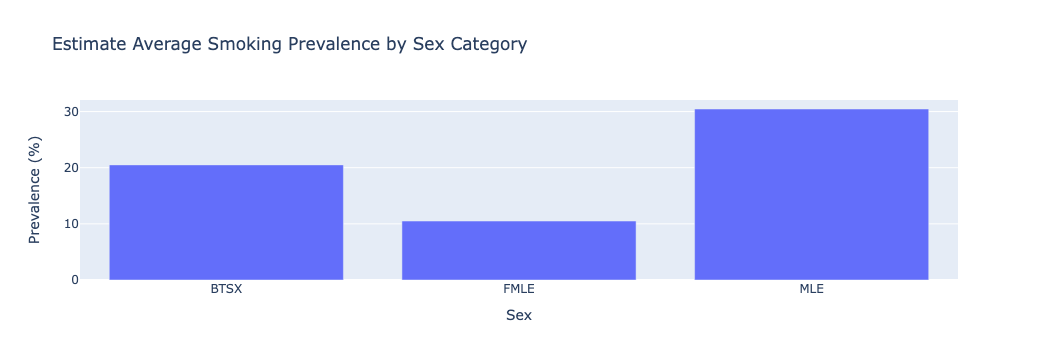

In [43]:
import plotly.express as px

# Perform the aggregation to get the average value for each 'Dim1' category
aggregated_data = final_prevalence.groupby('Sex')['Prevalence'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(
    aggregated_data,
    x='Sex',
    y='Prevalence',
    color=None,
    title='Estimate Average Smoking Prevalence by Sex Category',
)

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Prevalence (%)',
)

# Show the plot
fig.show()


##### Estimate Average Smoking Prevalence by Sex Category over the time

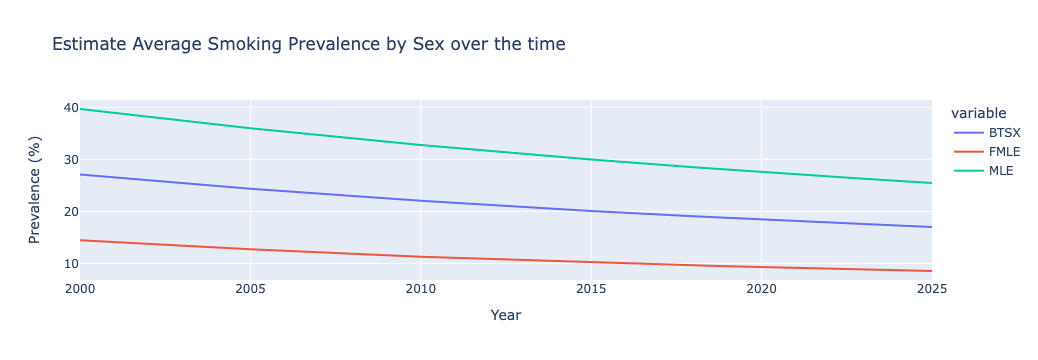

In [44]:
# Group by 'ParentTitle' (WHO Region) and 'TimeDimensionValue' (Year) and calculate the mean of 'NumericValue' (Prevalence)

average_numeric_value_over_years = final_prevalence.groupby(['Sex', 'Year'])['Prevalence'].mean().reset_index()

pivot_table = pd.pivot_table(
    average_numeric_value_over_years,
    values='Prevalence',
    index='Year',
    columns='Sex',
    aggfunc='mean'
)

pivot_table.reset_index(inplace=True)

fig = px.line(
    pivot_table,
    x='Year',
    y=pivot_table.columns[1:],  
    title='Estimate Average Smoking Prevalence by Sex over the time'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Prevalence (%)',
)

fig.show()


##### Estimate Average Smoking Prevalence by Country

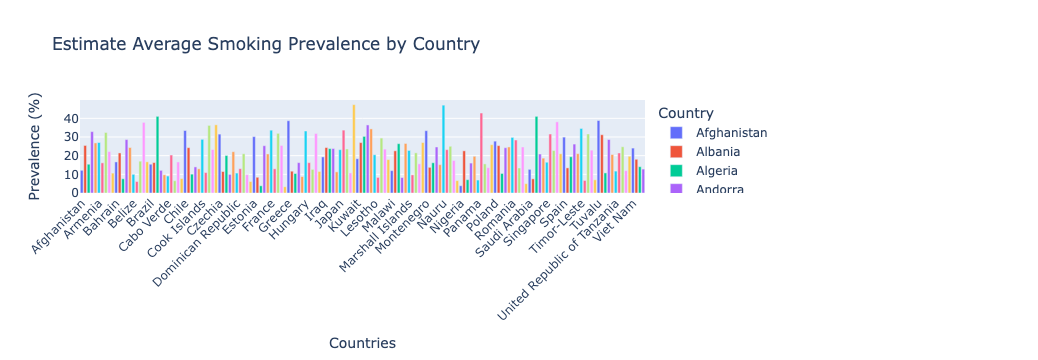

In [45]:
# Perform the aggregation to get the average value for each country
aggregated_data = final_prevalence.groupby('Country')['Prevalence'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(
    aggregated_data,
    x='Country',
    y='Prevalence',
    color='Country',
    title='Estimate Average Smoking Prevalence by Country',
)

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Countries',
    yaxis_title='Prevalence (%)',
    xaxis_tickangle=-45,  
)

# Show the plot
fig.show()


##### Top 50 Countries with Estimated Highest Smoking Prevalence

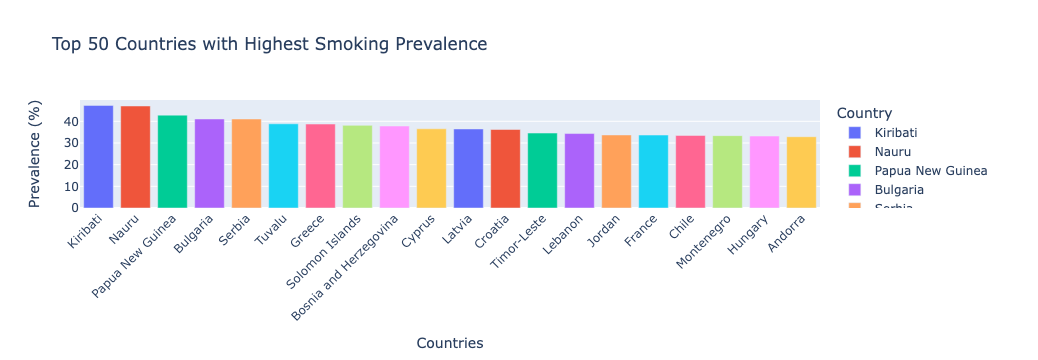

In [46]:
# Perform the aggregation to get the average value for each country
aggregated_data = final_prevalence.groupby('Country')['Prevalence'].mean().reset_index()

# Sort the aggregated data by 'NumericValue' in descending order
aggregated_data = aggregated_data.sort_values('Prevalence', ascending=False)

# Select the top 50 rows
top_50_countries = aggregated_data.head(20)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_50_countries,
    x='Country',
    y='Prevalence',
    color='Country',
    title='Top 50 Countries with Highest Smoking Prevalence',
)

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Countries',
    yaxis_title='Prevalence (%)',
    xaxis_tickangle=-45,
)

# Show the plot
fig.show()


##### Estimate Average Smoking Prevalence by Country over the years.

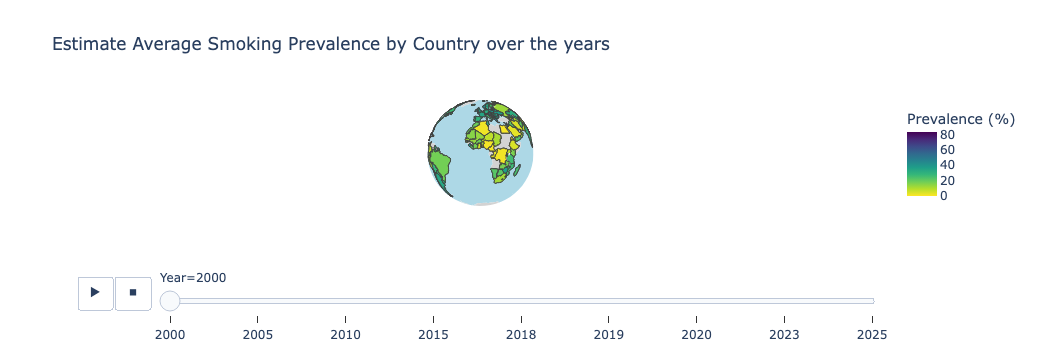

In [47]:
# Sort the dataframe by 'TimeDimensionValue' in ascending order
aggregated_data = final_prevalence.sort_values('Year')

fig = px.choropleth(
    aggregated_data,
    locations='Country',  # Column with country names
    locationmode='country names',  # Set location mode to country names
    color='Prevalence',  
    hover_name='Country',  # Hover text will show country name
    animation_frame='Year',  # Animation frame based on year
    color_continuous_scale='Viridis_r',  # Color scale
    title='Estimate Average Smoking Prevalence by Country over the years',
)

fig.update_geos(
    showcoastlines=True,
    coastlinecolor='RebeccaPurple',
    showland=True,
    landcolor='LightGrey',
    showocean=True,
    oceancolor='LightBlue',
    projection_type='orthographic',  # Projection type
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title='Prevalence (%)'),
)

fig.show()


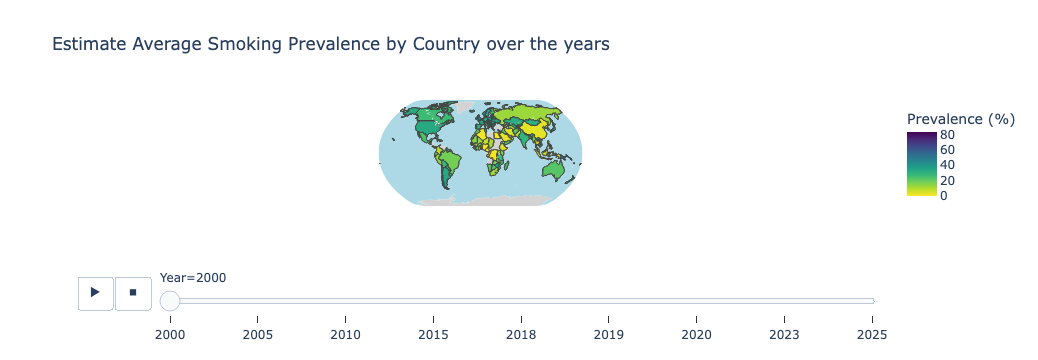

In [48]:
# Sort the dataframe by 'TimeDimensionValue' in ascending order
aggregated_data = final_prevalence.sort_values('Year')

# Using a different Projection_type

fig = px.choropleth(
    aggregated_data,
    locations='Country',  # Column with country names
    locationmode='country names',  # Set location mode to country names
    color='Prevalence',  
    hover_name='Country',  # Hover text will show country name
    animation_frame='Year',  # Animation frame based on year
    color_continuous_scale='Viridis_r',  # Color scale
    title='Estimate Average Smoking Prevalence by Country over the years',
)

fig.update_geos(
    showcoastlines=True,
    coastlinecolor='RebeccaPurple',
    showland=True,
    landcolor='LightGrey',
    showocean=True,
    oceancolor='LightBlue',
    projection_type='natural earth',  # Projection type
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title='Prevalence (%)'),
)

fig.show()

##### Estimate Average Smoking Prevalence by WHO Region.

In [49]:
# Group by WHO Region and calculate the mean of Estimate Average Smoking Prevalence
average_numeric_value = final_prevalence.groupby('WHO Region')['Prevalence'].mean()

# Display the average numeric value per parent title
print(average_numeric_value)


WHO Region
Africa                   11.481120
Americas                 15.066821
Eastern Mediterranean    17.879259
Europe                   27.648450
South-East Asia          22.945926
Western Pacific          27.003407
Name: Prevalence, dtype: float64


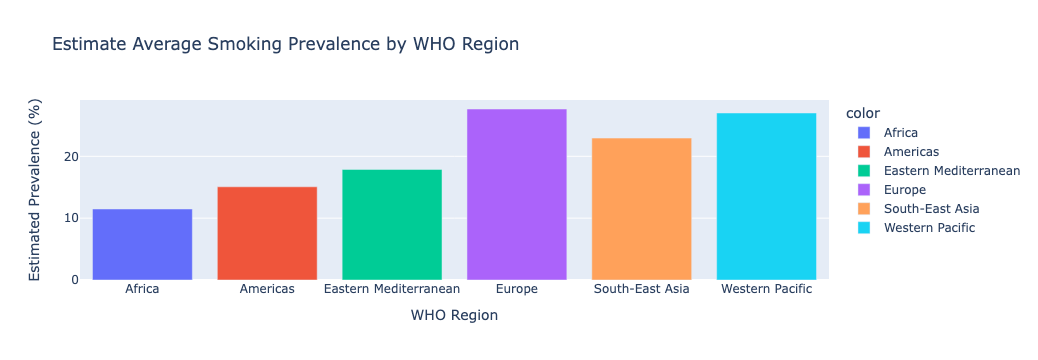

In [50]:
# Estimate Average Smoking Prevalence by WHO Region

fig = px.bar(
    x=average_numeric_value.index, 
    y=average_numeric_value.values,
    color=average_numeric_value.index,
    labels={'x': 'WHO Region', 'y': 'Estimated Prevalence'},
    title='Estimate Average Smoking Prevalence by WHO Region',
)

fig.update_layout(
    xaxis_title='WHO Region',
    yaxis_title='Estimated Prevalence (%)',
)

fig.show()


##### Estimate Average Smoking Prevalence by WHO Region over the time.

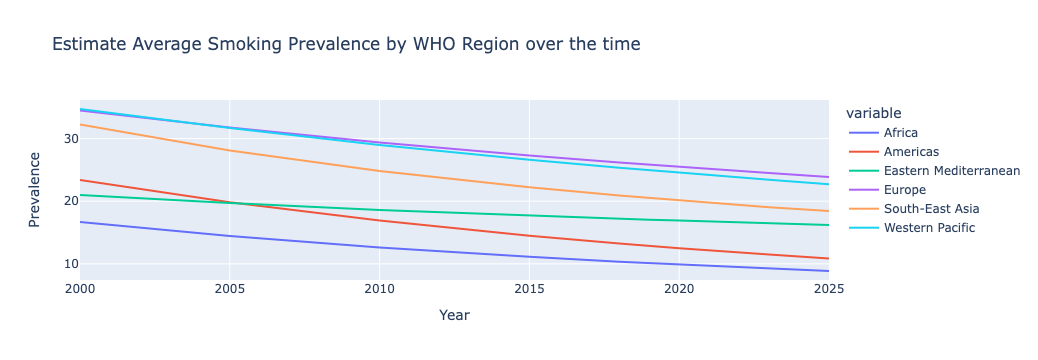

In [51]:
# Group by WHO Region and Year and calculate the mean of Prevalence

average_numeric_value_over_years = final_prevalence.groupby(['WHO Region', 'Year'])['Prevalence'].mean().reset_index()

pivot_table = pd.pivot_table(
    average_numeric_value_over_years,
    values='Prevalence',
    index='Year',
    columns='WHO Region',
    aggfunc='mean'
)

pivot_table.reset_index(inplace=True)

fig = px.line(
    pivot_table,
    x='Year',
    y=pivot_table.columns[1:],  
    title='Estimate Average Smoking Prevalence by WHO Region over the time'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Prevalence',
)

fig.show()


##### Get country O_P data function

Writting a function to get the indicator value for each country:

In [52]:
def get_country_data(final_O_P, country):
    country_data = final_O_P[final_O_P['Country'] == country] #Title is the country column
    if country_data.empty:
        return f'wrong spelling or "No data available for {country}'  # Return None if no data for the given country
    
    specific_data = country_data[['Country', 'Year', 'Help_score', 'Protection_score']]

    return specific_data

In [53]:
result = get_country_data(final_O_P, 'Colombia')
result

Country  Year  Help_score  Protection_score
304  Colombia  2007           3                 2
305  Colombia  2008           3                 5
306  Colombia  2010           3                 5
307  Colombia  2012           3                 5
308  Colombia  2014           3                 5
309  Colombia  2016           4                 5
310  Colombia  2018           4                 5
311  Colombia  2020           4                 5

In [54]:
result2 = get_country_data(final_O_P, 'Kiribati')
result2

Country  Year  Help_score  Protection_score
736  Kiribati  2007           3                 2
737  Kiribati  2008           3                 2
738  Kiribati  2010           3                 2
739  Kiribati  2012           2                 2
740  Kiribati  2014           3                 3
741  Kiribati  2016           4                 3
742  Kiribati  2018           4                 4
743  Kiribati  2020           4                 4

##### Relation Smoking Prevalence vs Premature Deaths by NCD (proportion among all NCD)

In [55]:
final_premature_deaths

Country Code      Country             WHO Region  Year   Sex  \
0              AFG  Afghanistan  Eastern Mediterranean  2000   MLE   
1              AFG  Afghanistan  Eastern Mediterranean  2001   MLE   
2              AFG  Afghanistan  Eastern Mediterranean  2002   MLE   
3              AFG  Afghanistan  Eastern Mediterranean  2003   MLE   
4              AFG  Afghanistan  Eastern Mediterranean  2004   MLE   
...            ...          ...                    ...   ...   ...   
10975          ZWE     Zimbabwe                 Africa  2015  BTSX   
10976          ZWE     Zimbabwe                 Africa  2016  BTSX   
10977          ZWE     Zimbabwe                 Africa  2017  BTSX   
10978          ZWE     Zimbabwe                 Africa  2018  BTSX   
10979          ZWE     Zimbabwe                 Africa  2019  BTSX   

       PrematureDeaths/NCD  
0                 72.78874  
1                 72.56174  
2                 72.96648  
3                 73.48131  
4                 73.89048  
...                    ...  
10975             63.71990  
10976             63.01052  
10977             61.81475  
10978             61.57020  
10979             62.06367  

[10980 rows x 6 columns]

In [57]:
final_prevalence

Country Code      Country             WHO Region  Year   Sex  Prevalence
0             AFG  Afghanistan  Eastern Mediterranean  2020  BTSX         9.5
1             AFG  Afghanistan  Eastern Mediterranean  2020   MLE        16.7
2             AFG  Afghanistan  Eastern Mediterranean  2020  FMLE         2.2
3             AFG  Afghanistan  Eastern Mediterranean  2005  BTSX        17.1
4             AFG  Afghanistan  Eastern Mediterranean  2005   MLE        27.5
...           ...          ...                    ...   ...   ...         ...
4423          ZWE     Zimbabwe                 Africa  2025  FMLE         0.6
4424          ZWE     Zimbabwe                 Africa  2000  BTSX        19.5
4425          ZWE     Zimbabwe                 Africa  2000   MLE        36.1
4426          ZWE     Zimbabwe                 Africa  2000  FMLE         2.9
4427          ZWE     Zimbabwe                 Africa  2015  FMLE         1.2

[4428 rows x 6 columns]

In [59]:
# Merging data to the scatterplot 
scatter_data = pd.merge(final_prevalence, final_premature_deaths, on=['Country Code', 'Country', 'WHO Region', 'Year', 'Sex'])
scatter_data

Country Code      Country             WHO Region  Year   Sex  Prevalence  \
0             AFG  Afghanistan  Eastern Mediterranean  2005  BTSX        17.1   
1             AFG  Afghanistan  Eastern Mediterranean  2005   MLE        27.5   
2             AFG  Afghanistan  Eastern Mediterranean  2005  FMLE         6.7   
3             AFG  Afghanistan  Eastern Mediterranean  2010  BTSX        14.0   
4             AFG  Afghanistan  Eastern Mediterranean  2010   MLE        23.4   
...           ...          ...                    ...   ...   ...         ...   
2839          ZWE     Zimbabwe                 Africa  2019  FMLE         0.9   
2840          ZWE     Zimbabwe                 Africa  2000  BTSX        19.5   
2841          ZWE     Zimbabwe                 Africa  2000   MLE        36.1   
2842          ZWE     Zimbabwe                 Africa  2000  FMLE         2.9   
2843          ZWE     Zimbabwe                 Africa  2015  FMLE         1.2   

      PrematureDeaths/NCD  
0                71.98372  
1                74.25545  
2                69.67499  
3                70.07750  
4                72.69907  
...                   ...  
2839             56.25971  
2840             56.86102  
2841             59.35542  
2842             54.56320  
2843             58.01034  

[2844 rows x 7 columns]

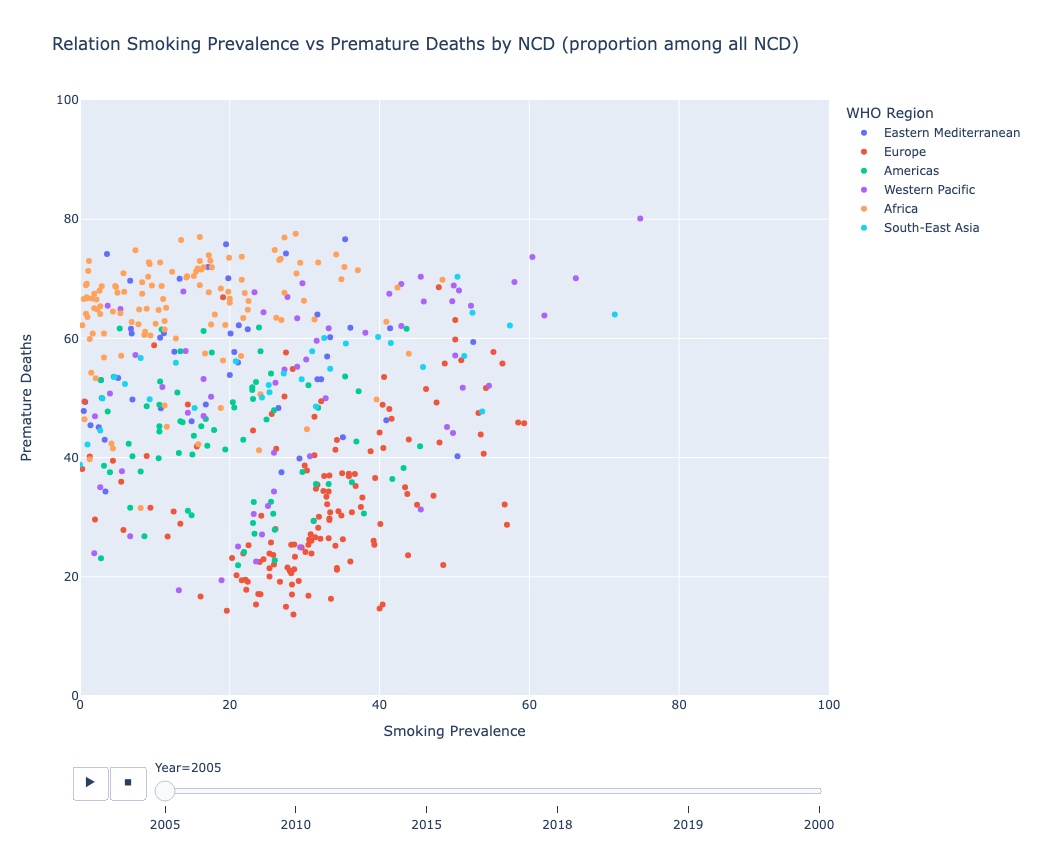

In [62]:

# Scatterplot of Smoking Prevalence vs Premature Deaths

fig = px.scatter(
    scatter_data,
    x='Prevalence',
    y='PrematureDeaths/NCD',
    title='Relation Smoking Prevalence vs Premature Deaths by NCD (proportion among all NCD)',
    labels={'Prevalence': 'Smoking Prevalence', 'PrematureDeaths/NCD': 'Premature Deaths'},
    animation_frame='Year',
    color = 'WHO Region',
    width=850, 
    height=850 
)

# Set fixed axis ranges
fig.update_xaxes(range=[0, 100])
fig.update_yaxes(range=[0, 100])

# Show the plot
fig.show()

### 5. Design the Dashboard

I'm going to create a Python script for building the dashboard using the Dash framework. 

I chose Dash for building the dashboard due to its seamless integration with Python and its ability to create interactive web applications for data visualization with relative ease. Dash's Python-centric approach means I can leverage my existing Python programming skills without having to learn new languages. Its declarative syntax for defining the layout and interactions simplifies the development process. Additionally, Dash offers a wide range of pre-built components for creating charts, graphs, and interactive elements, reducing the need for extensive custom coding. The framework's active community and extensive documentation provide a wealth of resources to troubleshoot issues and learn best practices. Overall, Dash's combination of simplicity, versatility, and compatibility with Python makes it a powerful choice for rapidly developing engaging and interactive dashboards.

**Overal Process View** 

First, I'll make sure I have Dash installed by running a simple `pip` command. Then, I'll set up my Python script, which I'll name `dashboard_app.py`, and import the necessary libraries such as `dash`, `dash_core_components`, `dash_html_components`, and `Input` and `Output` from `dash.dependencies`. With the app initialized, I'll define the layout using HTML and Dash components, structuring the interface the way I want it. To make the dashboard interactive, I'll use callbacks that respond to user inputs and update the displayed content accordingly. Once everything is set up, I'll run the app using the `app.run_server(debug=True)` command and access it through my web browser. This process will allow me to create a dynamic and interactive dashboard for data visualization and analysis.

### 6. Deploy the Dashboard

I'll start by pushing my `dashboard_app.py` script and any other necessary files to this repository. To ensure a clean and reproducible environment, I'll include a `requirements.txt` file listing all the dependencies, including Dash and other libraries used in the project. I'll also add a `.gitignore` file to exclude any sensitive or unnecessary files from being committed to the repository. 

Next, I'll utilize GitHub Pages to deploy the dashboard. I'll create a new branch named `gh-pages` and configure it to host the app. I'll create an HTML file that serves as an entry point to the dashboard and write a small JavaScript snippet to embed the Dash app into the HTML page. I'll push these changes to the `gh-pages` branch.

GitHub Pages will then automatically build and deploy the dashboard. I can access the deployed dashboard by navigating to the GitHub Pages URL associated with my repository. Whenever I make updates to the dashboard, I'll push the changes to the `main` branch and merge them into the `gh-pages` branch to keep the deployed version up to date.

This approach allows for a straightforward and free way to host and share the dashboard online using GitHub's infrastructure.

## Conclusions

- The GHO repository data is less organized than expected.
- The number of indicators is high but could be a lot of redundancy among them.
- I don't have data regarding age - tobacco use/prevalence yet.
- Seems that GHO does not have constantly updated data about Tobacco control.
- The indicators with most complete and diverse data regarding years were selected.
